## Import Libraries

In this cell, we load all necessary packages:

- **pandas**, **numpy** for data handling  
- **matplotlib**, **seaborn** for visualization  
- **scikit-learn** (model selection, preprocessing, classifiers, metrics)  
- **XGBoost** for gradient-boosted trees  
- **SMOTE** from **imbalanced-learn** to correct class imbalance

In [99]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix

## Load the Dataset

Here we read the red wine quality data from CSV into a DataFrame and display its first five rows to confirm successful loading and inspect the columns.

In [10]:
# Load the Dataset
WineData = pd.read_csv('winequality-red.csv')
WineData.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Basic EDA: DataFrame Info

Calling `WineData.info()` shows:

- Number of rows and columns  
- Non-null counts  
- Data types of each column  

This helps us spot missing values and understand which features are numeric vs. categorical.


In [18]:
# Basic Exploratory Data Analysis (EDA)
WineData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


## Descriptive Statistics

`WineData.describe()` returns summary statistics (mean, standard deviation, min/max, quartiles) for each numeric feature, letting us detect outliers and get a sense of each variable’s scale.


In [20]:
WineData.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## Define & Visualize Quality Categories

- We bin the numeric `quality` score into three labels: **not good**, **average**, **good**.  
- We then print and plot their counts to check for class imbalance, which will inform our modeling strategy.


Quality category distribution:
quality_category
average     1319
good         217
not good      63
Name: count, dtype: int64


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3100\1367048493.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality_category', data=WineData, palette='Set2')


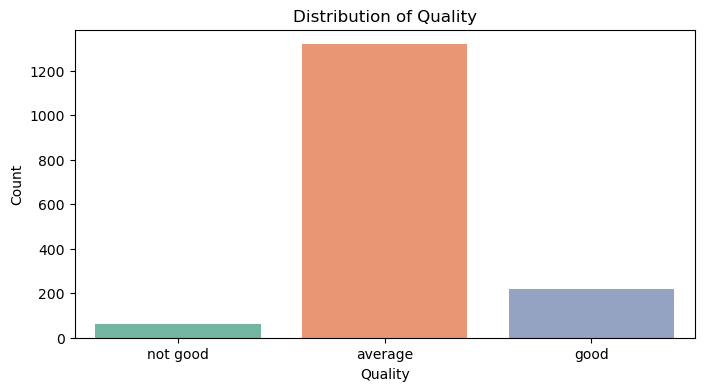

In [28]:
# Defining Quality Categories
WineData['quality_category'] = pd.cut(
    WineData['quality'],
    bins=[0, 4, 6, 10],  
    labels=['not good', 'average', 'good']
)

# Check for distribution of quality categories
print("Quality category distribution:")
print(WineData['quality_category'].value_counts())

plt.figure(figsize=(8, 4))
sns.countplot(x='quality_category', data=WineData, palette='Set2')
plt.title('Distribution of Quality')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

## Distribution of Raw Quality Scores

A histogram of the original quality scores (3–9) reveals the underlying distribution and helps validate our chosen category cutoffs.


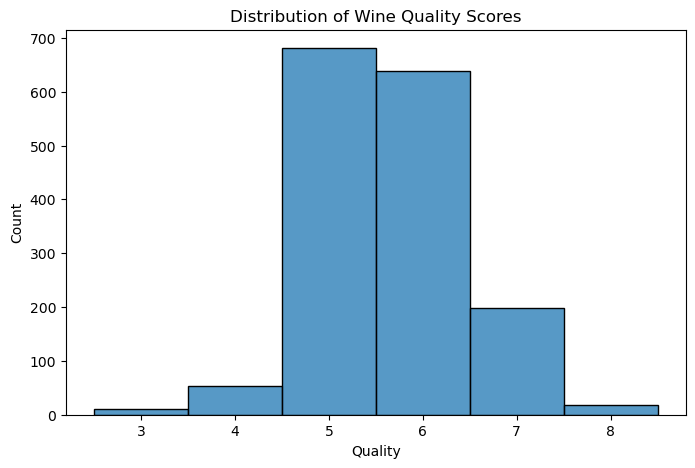

In [32]:
# Check for distribution with score
plt.figure(figsize=(8, 5))
sns.histplot(WineData['quality'], bins=range(3, 10), discrete=True)
plt.title("Distribution of Wine Quality Scores")
plt.xlabel("Quality")
plt.ylabel("Count")
plt.show()

## Feature Distributions

We plot histograms for every physicochemical variable to inspect:

- Skewness or multi-modality  
- Whether feature transformations (e.g., log) might be needed  
- Any obvious outliers


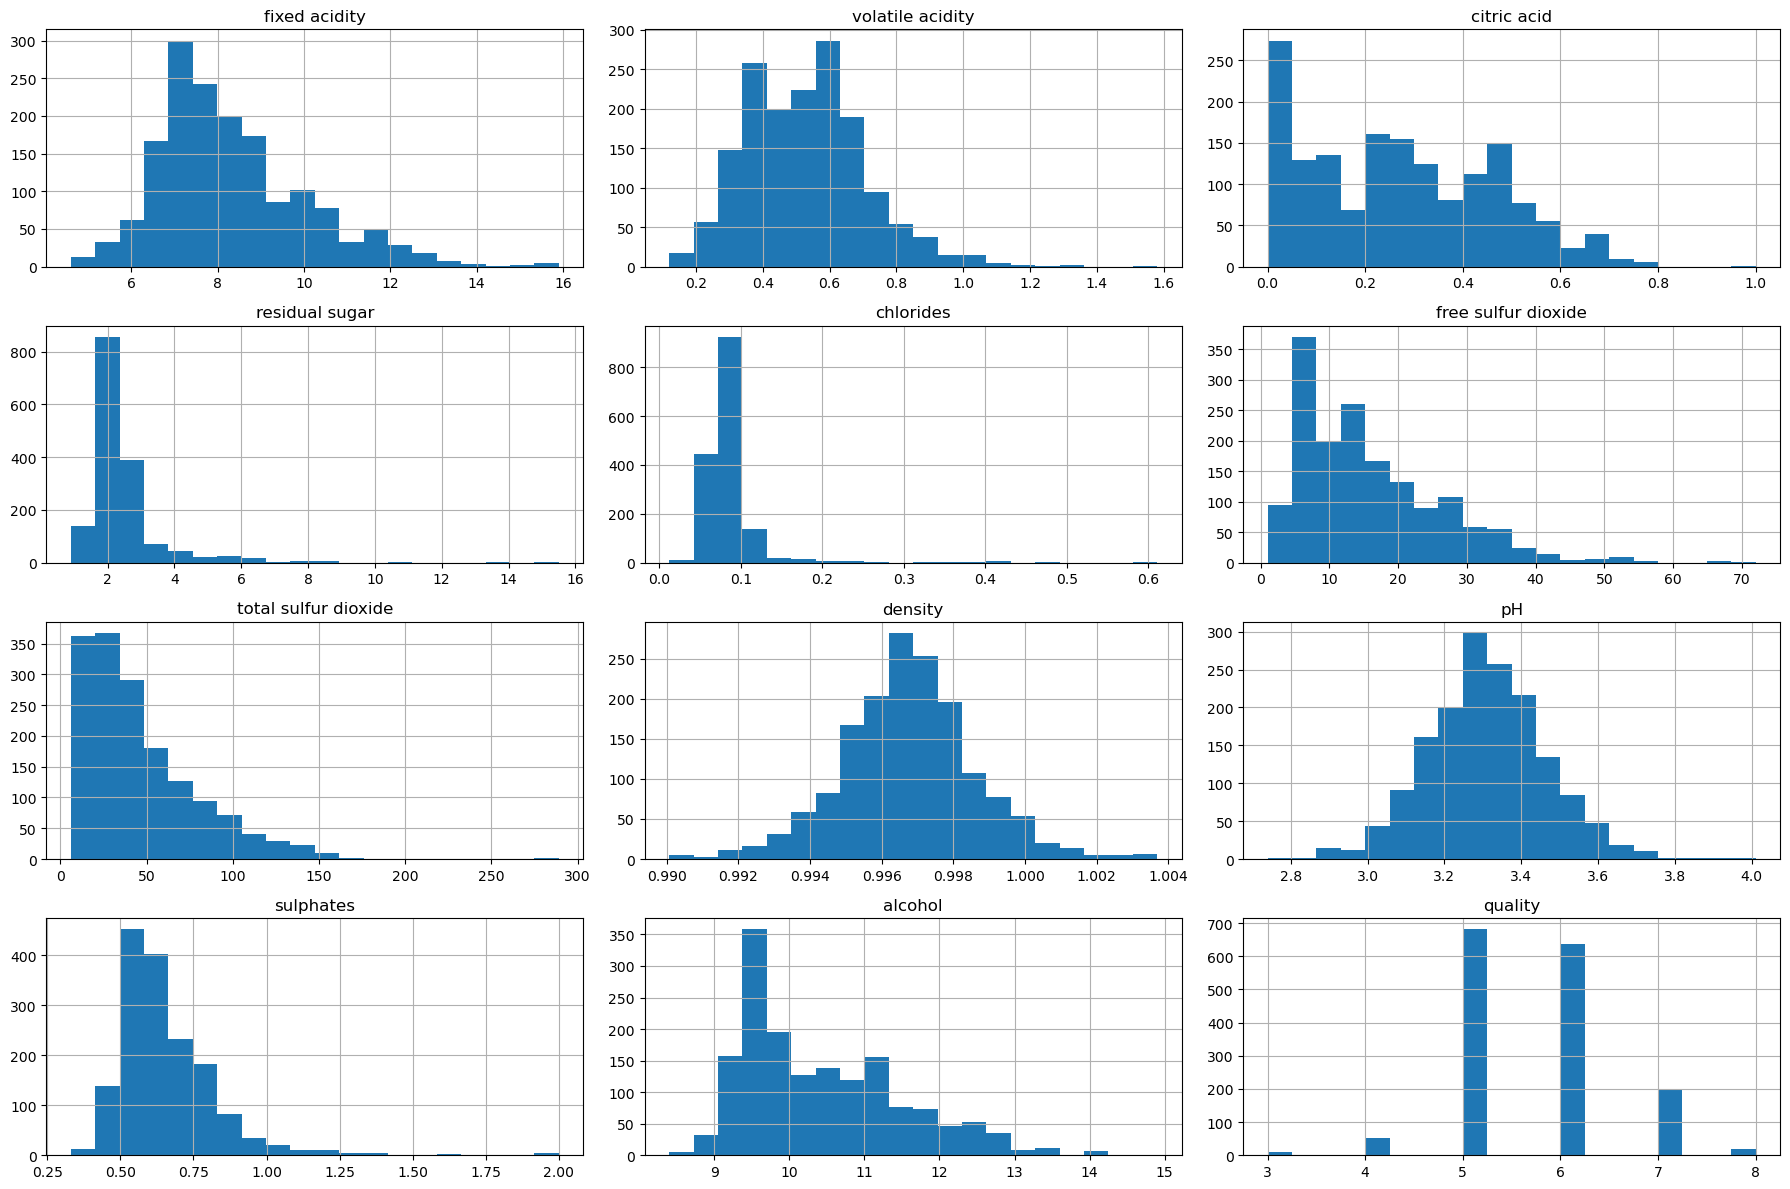

In [36]:
# Plot histograms for all features
WineData.drop('quality_category', axis=1).hist(bins=20, layout=(4, 3), figsize=(18, 12))
plt.tight_layout()
plt.show()

## Boxplots by Quality Category

For each feature, we draw a boxplot grouped by quality category:

- Shows median, interquartile range, and outliers  
- Highlights which variables differ most strongly across quality levels

In [ ]:
# Plot boxplots for the distribution of each feature in different quality categories
for col in WineData.columns[:-2]:  
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='quality_category', y=col, data=WineData, palette='viridis')

<Figure size 1000x500 with 0 Axes>

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3100\3822166321.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality_category', y=col, data=WineData, palette='viridis')


<Axes: xlabel='quality_category', ylabel='fixed acidity'>

Text(0.5, 1.0, 'fixed acidity Distribution by Quality Category')

Text(0.5, 0, 'Quality Category')

Text(0, 0.5, 'fixed acidity')

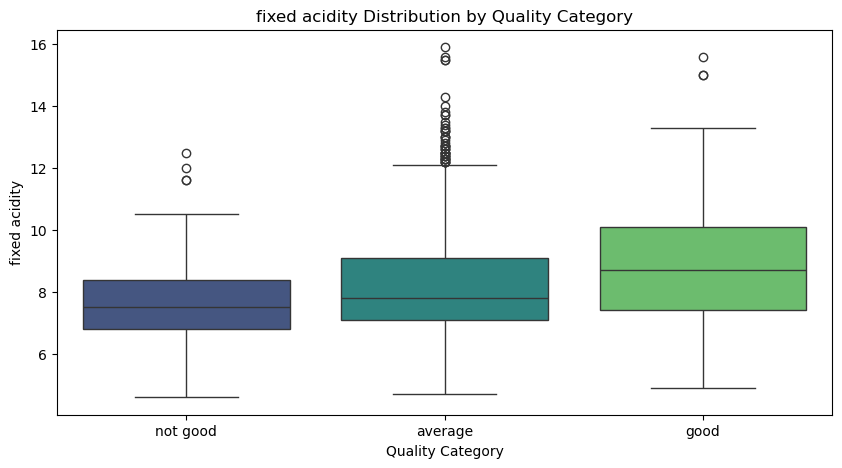

<Figure size 1000x500 with 0 Axes>

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3100\3822166321.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality_category', y=col, data=WineData, palette='viridis')


<Axes: xlabel='quality_category', ylabel='volatile acidity'>

Text(0.5, 1.0, 'volatile acidity Distribution by Quality Category')

Text(0.5, 0, 'Quality Category')

Text(0, 0.5, 'volatile acidity')

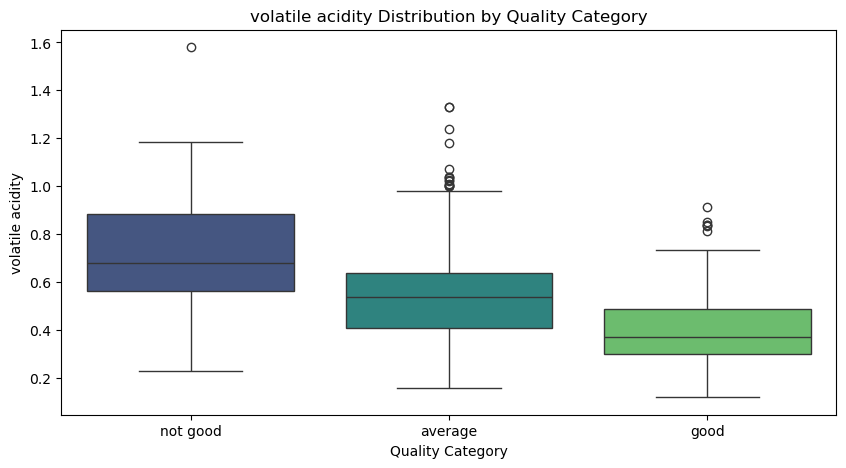

<Figure size 1000x500 with 0 Axes>

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3100\3822166321.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality_category', y=col, data=WineData, palette='viridis')


<Axes: xlabel='quality_category', ylabel='citric acid'>

Text(0.5, 1.0, 'citric acid Distribution by Quality Category')

Text(0.5, 0, 'Quality Category')

Text(0, 0.5, 'citric acid')

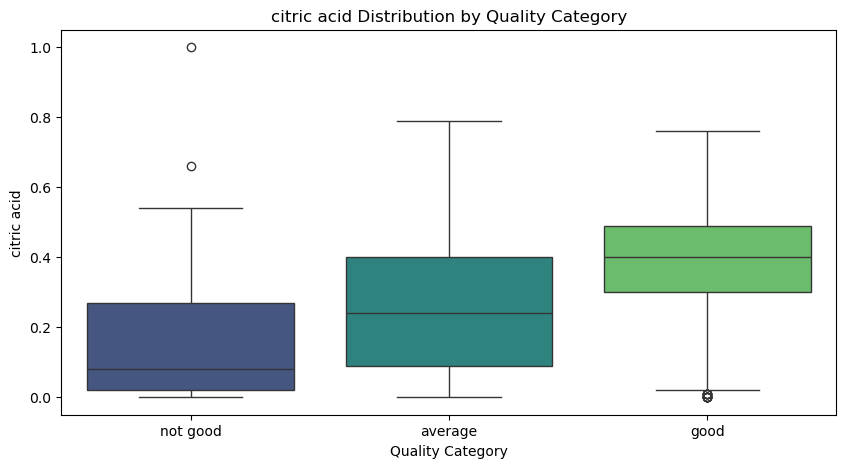

<Figure size 1000x500 with 0 Axes>

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3100\3822166321.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality_category', y=col, data=WineData, palette='viridis')


<Axes: xlabel='quality_category', ylabel='residual sugar'>

Text(0.5, 1.0, 'residual sugar Distribution by Quality Category')

Text(0.5, 0, 'Quality Category')

Text(0, 0.5, 'residual sugar')

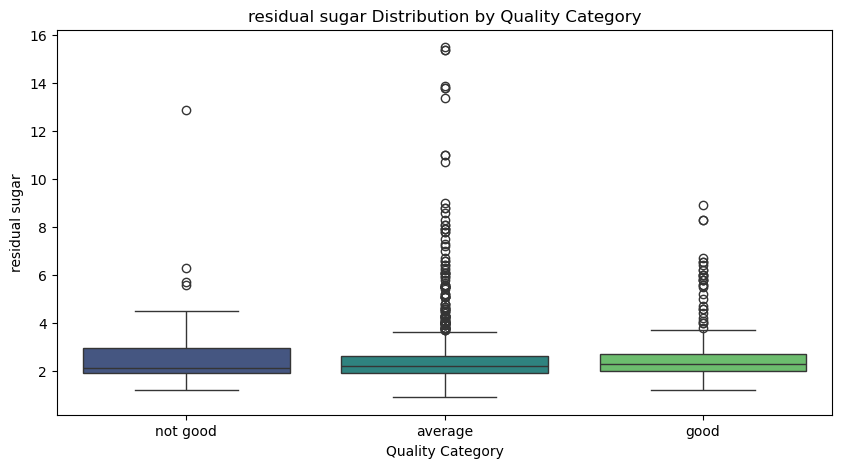

<Figure size 1000x500 with 0 Axes>

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3100\3822166321.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality_category', y=col, data=WineData, palette='viridis')


<Axes: xlabel='quality_category', ylabel='chlorides'>

Text(0.5, 1.0, 'chlorides Distribution by Quality Category')

Text(0.5, 0, 'Quality Category')

Text(0, 0.5, 'chlorides')

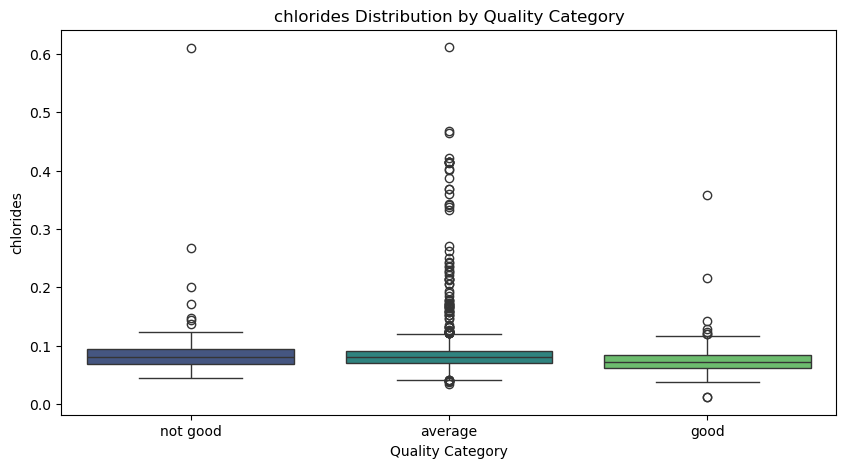

<Figure size 1000x500 with 0 Axes>

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3100\3822166321.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality_category', y=col, data=WineData, palette='viridis')


<Axes: xlabel='quality_category', ylabel='free sulfur dioxide'>

Text(0.5, 1.0, 'free sulfur dioxide Distribution by Quality Category')

Text(0.5, 0, 'Quality Category')

Text(0, 0.5, 'free sulfur dioxide')

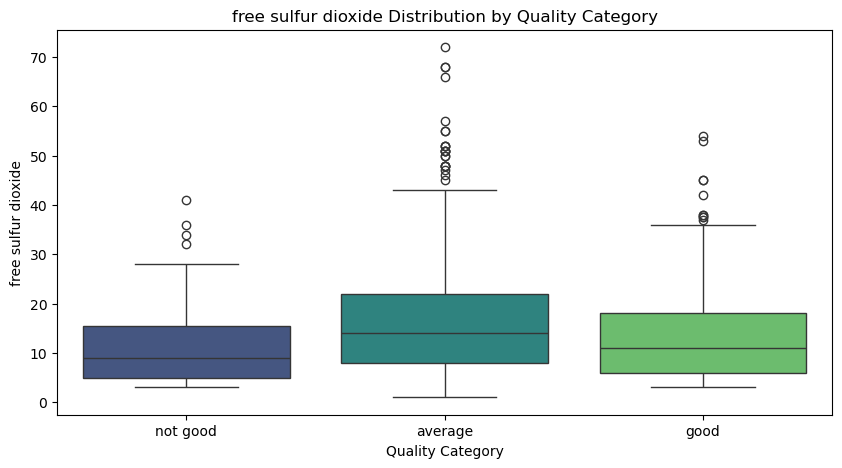

<Figure size 1000x500 with 0 Axes>

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3100\3822166321.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality_category', y=col, data=WineData, palette='viridis')


<Axes: xlabel='quality_category', ylabel='total sulfur dioxide'>

Text(0.5, 1.0, 'total sulfur dioxide Distribution by Quality Category')

Text(0.5, 0, 'Quality Category')

Text(0, 0.5, 'total sulfur dioxide')

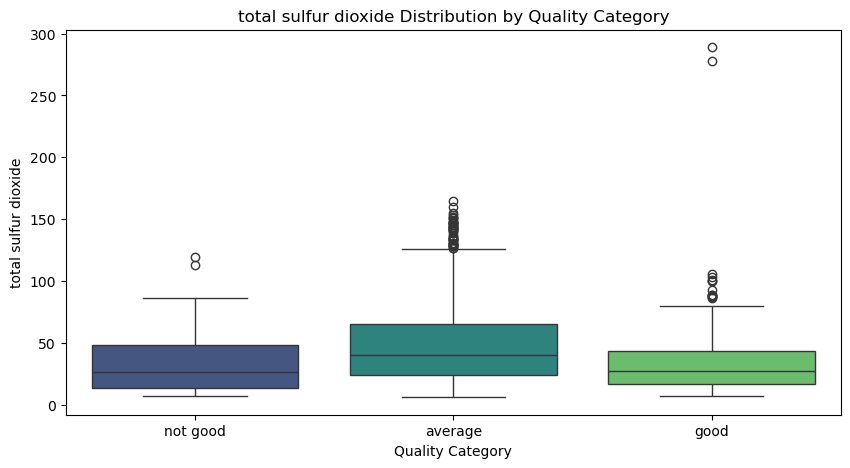

<Figure size 1000x500 with 0 Axes>

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3100\3822166321.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality_category', y=col, data=WineData, palette='viridis')


<Axes: xlabel='quality_category', ylabel='density'>

Text(0.5, 1.0, 'density Distribution by Quality Category')

Text(0.5, 0, 'Quality Category')

Text(0, 0.5, 'density')

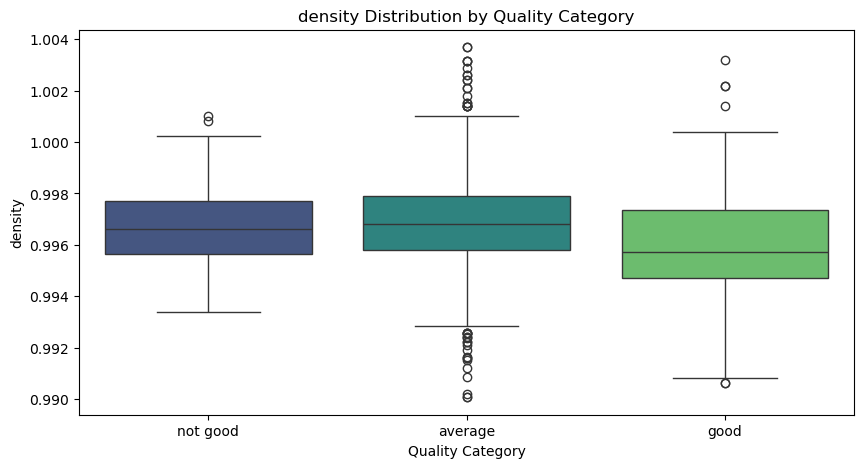

<Figure size 1000x500 with 0 Axes>

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3100\3822166321.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality_category', y=col, data=WineData, palette='viridis')


<Axes: xlabel='quality_category', ylabel='pH'>

Text(0.5, 1.0, 'pH Distribution by Quality Category')

Text(0.5, 0, 'Quality Category')

Text(0, 0.5, 'pH')

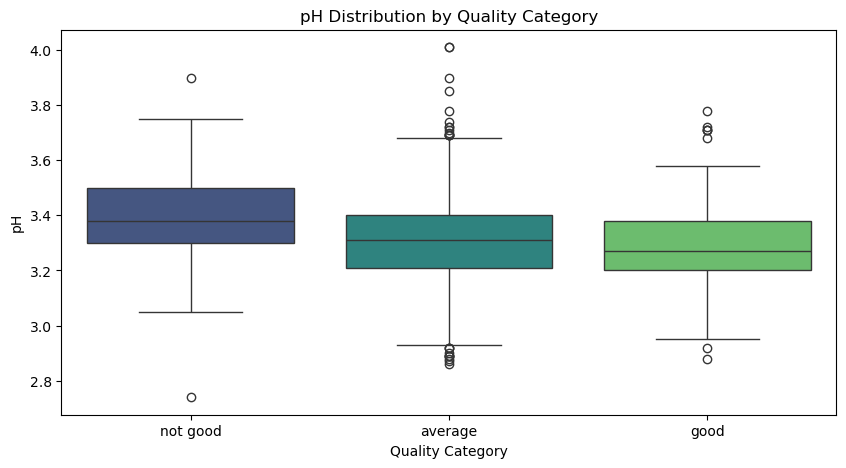

<Figure size 1000x500 with 0 Axes>

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3100\3822166321.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality_category', y=col, data=WineData, palette='viridis')


<Axes: xlabel='quality_category', ylabel='sulphates'>

Text(0.5, 1.0, 'sulphates Distribution by Quality Category')

Text(0.5, 0, 'Quality Category')

Text(0, 0.5, 'sulphates')

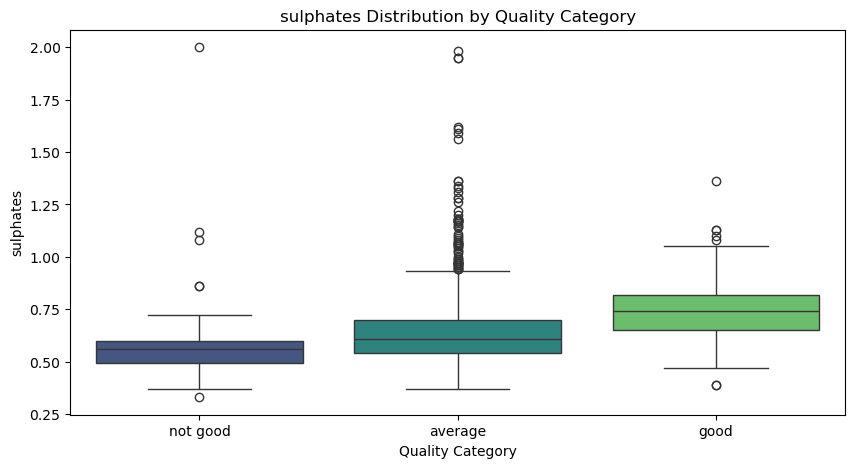

<Figure size 1000x500 with 0 Axes>

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3100\3822166321.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality_category', y=col, data=WineData, palette='viridis')


<Axes: xlabel='quality_category', ylabel='alcohol'>

Text(0.5, 1.0, 'alcohol Distribution by Quality Category')

Text(0.5, 0, 'Quality Category')

Text(0, 0.5, 'alcohol')

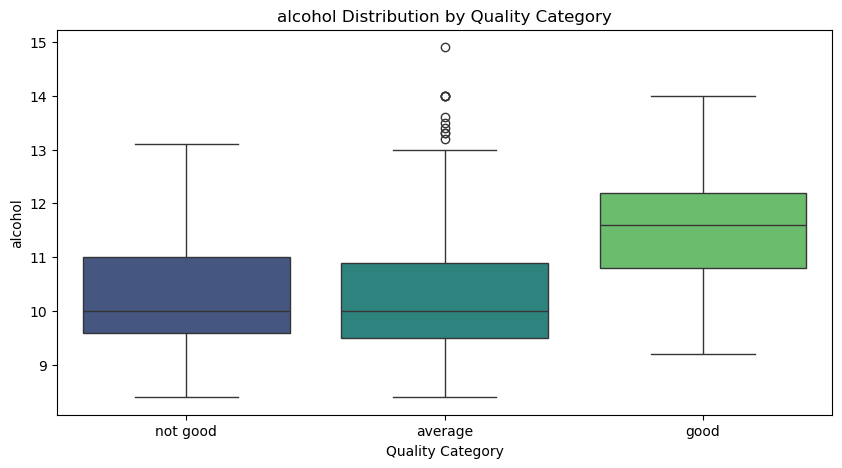

In [ ]:
    plt.title(f'{col} Distribution by Quality Category')
    plt.xlabel('Quality Category')
    plt.ylabel(col)
    plt.show()

## Correlation Matrix

Computing and plotting Pearson correlations among numeric features helps us:

- Spot multicollinearity  
- Identify which variables correlate most with `quality`


<Figure size 1200x800 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Matrix')

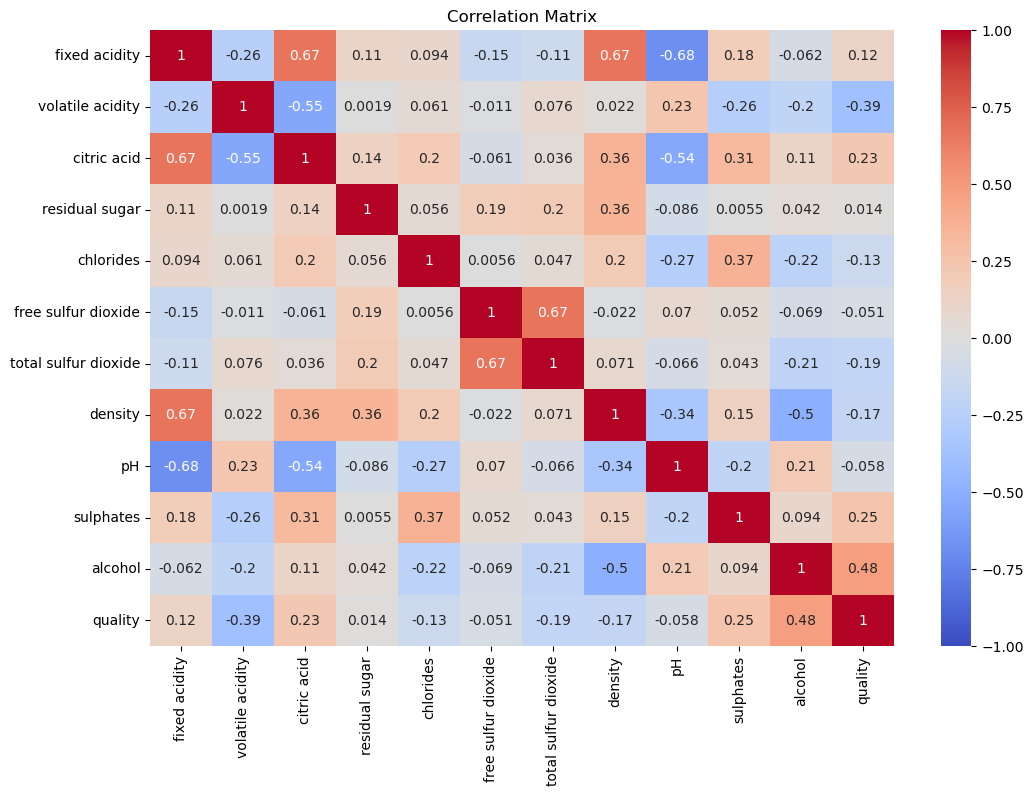

In [48]:
# Calculate the correlation matrix and plot a heatmap
# Exclude non - numerical columns (quality_category in this case)
corr = WineData.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

## Violin Plots of Key Features

Side-by-side violin plots for **alcohol** and **volatile acidity** illustrate both distribution shape and summary statistics across quality categories.


<Figure size 1500x500 with 0 Axes>

<Axes: >

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3100\2774190239.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='quality_category', y='alcohol', data=WineData, palette='Set3')


<Axes: xlabel='quality_category', ylabel='alcohol'>

Text(0.5, 1.0, 'Alcohol Distribution by Category (Violin Plot)')

<Axes: >

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3100\2774190239.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='quality_category', y='volatile acidity', data=WineData, palette='Set3')


<Axes: xlabel='quality_category', ylabel='volatile acidity'>

Text(0.5, 1.0, 'Volatile Acidity Distribution by Category (Violin Plot)')

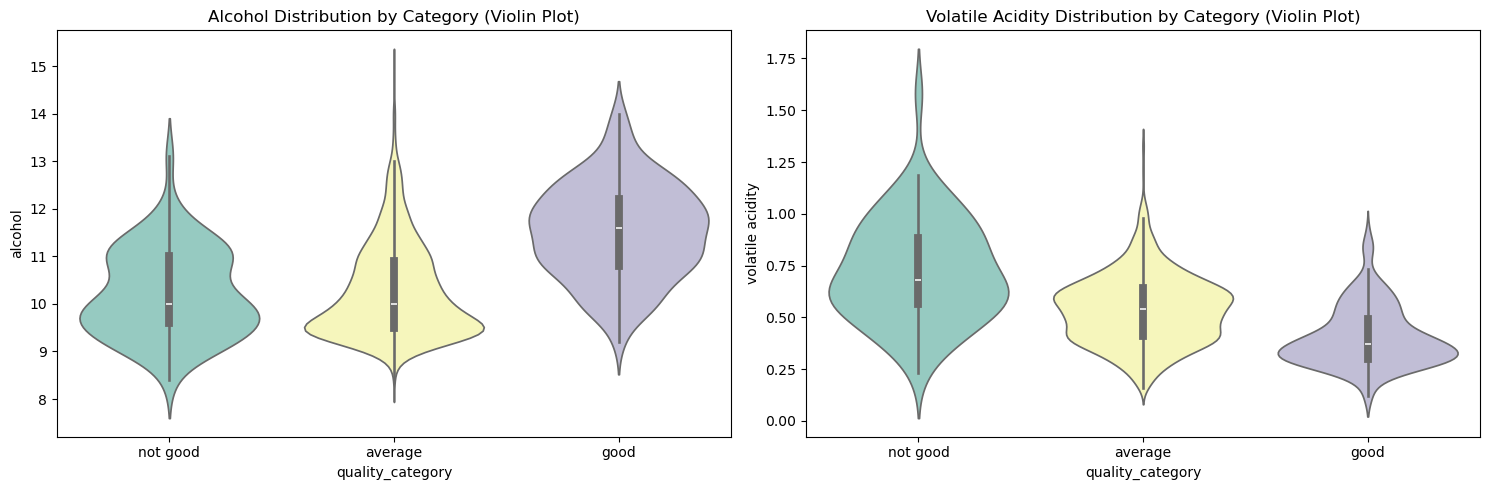

In [50]:
# Plot violin plots for key features (e.g., alcohol and volatile acidity)
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.violinplot(x='quality_category', y='alcohol', data=WineData, palette='Set3')
plt.title('Alcohol Distribution by Category (Violin Plot)')

plt.subplot(1, 2, 2)
sns.violinplot(x='quality_category', y='volatile acidity', data=WineData, palette='Set3')
plt.title('Volatile Acidity Distribution by Category (Violin Plot)')

plt.tight_layout()
plt.show()

## Prepare Features & Labels

- `X` contains all predictors (drop raw quality and category)  
- `y` is our new categorical target  
- We print the unique class labels to confirm


In [52]:
# Separate features and labels
X = WineData.drop(['quality', 'quality_category'], axis=1)
y = WineData['quality_category']

# Check the unique categories in the label
print("Unique categories:", y.unique())  

Unique categories: ['average', 'good', 'not good']
Categories (3, object): ['not good' < 'average' < 'good']


## Train/Test Split

We split into 80% train / 20% test sets, stratifying by `y` to preserve class proportions for fair evaluation.


In [54]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y  
)
print(f"Train size: {len(X_train)}, Test size: {len(X_test)}")

Train size: 1279, Test size: 320


## Standardize Features

Fitting a `StandardScaler` on training data and transforming both splits ensures:

- Zero mean, unit variance features  
- Better performance for many algorithms


In [56]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Baseline Models (No Upsampling)

- Train **Random Forest** and **XGBoost** on the imbalanced data  
- Print accuracy and full classification reports  
- This establishes a baseline to compare against later upsampling


In [60]:
# Convert y_train and y_test to category data type
y_train = y_train.astype('category')
y_test = y_test.astype('category')

# Train with Random Forest classifier
rf = RandomForestClassifier(random_state = 42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

# Train an XGBoost classifier
xgb_clf = xgb.XGBClassifier(random_state = 42, use_label_encoder = False, eval_metric='mlogloss')
xgb_clf.fit(X_train_scaled, y_train.cat.codes)

# Print the evaluation results
print("=== Random Forest (No Upsampling) ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(classification_report(y_test, y_pred_rf))

print("\n=== XGBoost (No Upsampling) ===")
y_pred_xgb = xgb_clf.predict(X_test_scaled)
# Decode the predictions for evaluation
y_pred_xgb_decoded = y_test.cat.categories[y_pred_xgb]
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb_decoded):.4f}")
print(classification_report(y_test, y_pred_xgb_decoded))

RandomForestClassifier(random_state=42)

C:\Users\Lenovo\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:17:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

=== Random Forest (No Upsampling) ===
Accuracy: 0.8750
              precision    recall  f1-score   support

     average       0.90      0.95      0.93       264
        good       0.69      0.67      0.68        43
    not good       0.00      0.00      0.00        13

    accuracy                           0.88       320
   macro avg       0.53      0.54      0.54       320
weighted avg       0.84      0.88      0.86       320


=== XGBoost (No Upsampling) ===
Accuracy: 0.8656
              precision    recall  f1-score   support

     average       0.91      0.93      0.92       264
        good       0.69      0.72      0.70        43
    not good       0.17      0.08      0.11        13

    accuracy                           0.87       320
   macro avg       0.59      0.58      0.58       320
weighted avg       0.85      0.87      0.86       320



C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Upsample Using SMOTE

We apply SMOTE to synthetically generate samples so that all three quality classes have the same number of training examples, mitigating imbalance.


In [66]:
# Find the maximum number of samples among classes in the original y_train
max_samples = y_train.value_counts().max()
sampling_strategy_dict = {'not good': max_samples, 'average': max_samples, 'good': max_samples}
smote = SMOTE(sampling_strategy = sampling_strategy_dict, random_state = 42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Check the class distribution after upsampling
print("Resampled class distribution:")
print(pd.Series(y_resampled).value_counts())

Resampled class distribution:
quality_category
not good    1055
average     1055
good        1055
Name: count, dtype: int64


## Re-Standardize After Upsampling

Because the training distribution has changed, we fit a fresh `StandardScaler` on the upsampled data and retransform the test set.


In [68]:
# Standardize the resampled data
scaler = StandardScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)
X_test_scaled = scaler.transform(X_test)

## Models on Upsampled Data

- Retrain **Random Forest** and **XGBoost** on the balanced training set  
- Print updated accuracy and classification reports  
- Compare these to the baseline to measure the effect of upsampling


In [93]:
# Convert y_resampled and y_test to category data type
y_resampled = pd.Series(y_resampled).astype('category')
y_test = pd.Series(y_test).astype('category')

# Train a Random Forest classifier on the resampled data
rf = RandomForestClassifier(random_state = 42)
rf.fit(X_resampled_scaled, y_resampled)
y_pred_rf_upsampled = rf.predict(X_test_scaled)

# Train an XGBoost classifier on the resampled data
xgb_clf = xgb.XGBClassifier(random_state = 42, use_label_encoder = False, eval_metric='mlogloss')
xgb_clf.fit(X_resampled_scaled, y_resampled.cat.codes)
y_pred_xgb_upsampled = xgb_clf.predict(X_test_scaled)

# Decode the predictions for evaluation
y_pred_xgb_decoded = y_test.cat.categories[y_pred_xgb_upsampled]

# Print the evaluation results for Random Forest
print("=== Random Forest (Upsampled) ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf_upsampled):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf_upsampled))

# Print the evaluation results for XGBoost
print("\n=== XGBoost (Upsampled) ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb_decoded):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb_decoded))

RandomForestClassifier(random_state=42)

C:\Users\Lenovo\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:39:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

=== Random Forest (Upsampled) ===
Accuracy: 0.8375

Classification Report:
              precision    recall  f1-score   support

     average       0.95      0.85      0.90       264
        good       0.58      0.88      0.70        43
    not good       0.31      0.38      0.34        13

    accuracy                           0.84       320
   macro avg       0.61      0.71      0.65       320
weighted avg       0.87      0.84      0.85       320


=== XGBoost (Upsampled) ===
Accuracy: 0.8469

Classification Report:
              precision    recall  f1-score   support

     average       0.93      0.88      0.90       264
        good       0.64      0.81      0.71        43
    not good       0.21      0.23      0.22        13

    accuracy                           0.85       320
   macro avg       0.59      0.64      0.61       320
weighted avg       0.86      0.85      0.85       320



## Confusion Matrix (XGBoost, Upsampled)

A heatmap of true vs. predicted labels for the upsampled XGBoost model visualizes remaining misclassifications and guides further tuning.


<Figure size 800x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Confusion Matrix - XGBoost')

Text(0.5, 36.72222222222221, 'Predicted Label')

Text(70.72222222222221, 0.5, 'True Label')

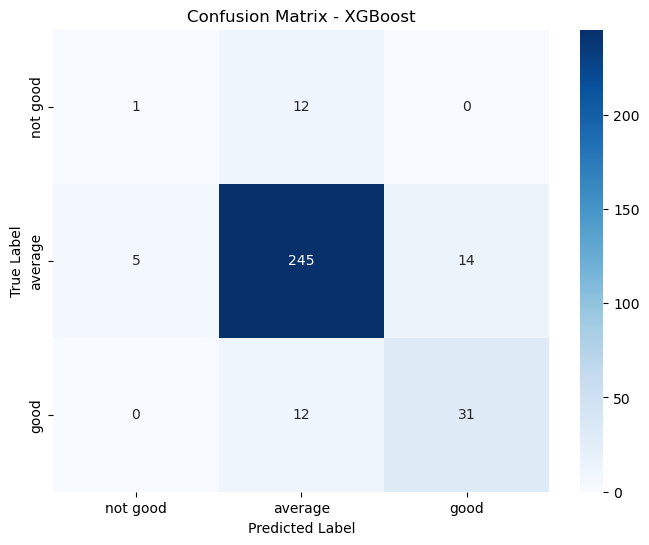

In [109]:
# Plot the confusion matrix
y_test = pd.Series(y_test).astype('category')
y_pred_xgb = pd.Series(y_pred_xgb).astype('category')

cm_xgb = confusion_matrix(y_test.cat.codes, y_pred_xgb.cat.codes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues',
            xticklabels=y_test.cat.categories,
            yticklabels=y_test.cat.categories)
plt.title('Confusion Matrix - XGBoost')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Conclusion

**Conclusion:**  
- Upsampling with SMOTE improved recall and F1 for minority classes.  
- XGBoost outperformed Random Forest in overall accuracy and balance.

**Key Improvements:**  
1. Use `GridSearchCV` to tune hyperparameters (tree depth, learning rate, class weights).  
2. Engineer interaction or polynomial features.  
3. Employ stratified k-fold cross-validation for more robust estimates.

**Future Implications:**  
- Deploy a tuned XGBoost model in a quality-control pipeline.  
- Leverage SHAP or LIME to explain predictions to domain experts.  
- Expand to additional wine types or regions for a more generalizable model.


## Key Improvements

**Key Improvements:**  
1. Use `GridSearchCV` to tune hyperparameters (tree depth, learning rate, class weights).  
2. Engineer interaction or polynomial features.  
3. Employ stratified k-fold cross-validation for more robust estimates.

## Future Directions